## Instalar los paquetes necesarios

In [1]:
!pip install spacy wordcloud emoji pymupdf
!python -m spacy download es_core_news_md
import nltk
nltk.download('punkt')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 14.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Paso 1: Cargar los textos en Python

In [1]:
with open("ElCorazonDelator.txt", "r", encoding="utf-8") as f:
    texto_1 = f.read()
with open("LaNocheBocaArriba.txt", "r", encoding="utf-8") as f:
    texto_2 = f.read()

## Paso 2: Normalizar los textos

In [ ]:
import re
import emoji

def normalizar(texto):
    texto = re.sub(r'<[^>]+>', '', texto)  # eliminar HTML
    texto = re.sub(r'http\S+|www\S+', '', texto)  # eliminar URLs
    texto = emoji.replace_emoji(texto, replace='')  # quitar emojis
    texto = re.sub(r'[^\w\s]', '', texto)  # eliminar puntuación
    texto = re.sub(r'\s+', ' ', texto)  # eliminar espacios extra
    return texto.strip()

texto_1_norm = normalizar(texto_1)
texto_2_norm = normalizar(texto_2)


## Paso 3: Describir los textos sin spaCy

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# Asegúrate de tener esto descargado
nltk.download('punkt')
# Descargar el recurso punkt_tab
nltk.download('punkt_tab')


def describir_texto(texto):
    parrafos = texto.split('\n\n')
    frases = sent_tokenize(texto)
    palabras = word_tokenize(texto)
    return len(parrafos), len(frases), len(palabras)

p1, f1, w1 = describir_texto(texto_1)
p2, f2, w2 = describir_texto(texto_2)

print(f"El corazón delator: {p1} párrafos, {f1} frases, {w1} palabras")
print(f"La noche boca arriba: {p2} párrafos, {f2} frases, {w2} palabras")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


El corazón delator: 1 párrafos, 102 frases, 2386 palabras
La noche boca arriba: 1 párrafos, 163 frases, 3573 palabras


Los dos cuentos tienen un solo párrafo cada uno, lo que hace que la narración sea bastante continua y sin pausas largas. Sin embargo, “La noche boca arriba” es más largo que “El corazón delator”: tiene más frases y más palabras.

Esto hace pensar que “La noche boca arriba” es un texto más extenso y quizás un poco más ágil, porque tiene muchas frases cortas que pueden hacer que la historia avance rápido. En cambio, “El corazón delator” tiene menos frases aunque no es tan corto, por lo que sus oraciones podrían ser más largas y detalladas, dando una sensación de un ritmo más lento o más pausado.

En general, “La noche boca arriba” parece ser un cuento con más acción o cambios rápidos, mientras que “El corazón delator” puede sentirse más intenso y concentrado en cada idea. Pero para saberlo con certeza, habría que ver también cómo están escritas esas frases y qué palabras usan.

## Paso 4: Tokenización, stopwords y lematización con spaCy

In [ ]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from collections import Counter

nlp = spacy.load("es_core_news_md")

def procesar(texto):
    doc = nlp(texto)
    tokens = [
        token.lemma_.lower() for token in doc
        if token.is_alpha and token.text.lower() not in STOP_WORDS
    ]
    return tokens

tokens_1 = procesar(texto_1_norm)
tokens_2 = procesar(texto_2_norm)

frecuencia_1 = Counter(tokens_1).most_common(20)
frecuencia_2 = Counter(tokens_2).most_common(20)

print("Frecuentes en El Corazón delator:", frecuencia_1)
print("Frecuentes en La noche boca arriba:", frecuencia_2)



Frecuentes en El Corazón delator: [('poder', 11), ('noche', 11), ('ojo', 11), ('viejo', 10), ('hombre', 8), ('ruido', 8), ('loco', 7), ('cabeza', 7), ('oficial', 7), ('corazón', 6), ('habitación', 6), ('abrir', 6), ('tiempo', 6), ('rumor', 6), ('ver', 5), ('puerta', 5), ('linterna', 5), ('hablar', 5), ('producir', 5), ('latido', 5)]
Frecuentes en La noche boca arriba: [('ir', 13), ('sentir', 13), ('olor', 12), ('noche', 11), ('pensar', 11), ('ver', 10), ('ojo', 10), ('mano', 9), ('brazo', 9), ('boca', 9), ('sueño', 9), ('calzada', 8), ('tiempo', 7), ('luz', 7), ('grito', 7), ('volver', 7), ('poder', 7), ('llevar', 7), ('haber', 7), ('abrir', 7)]


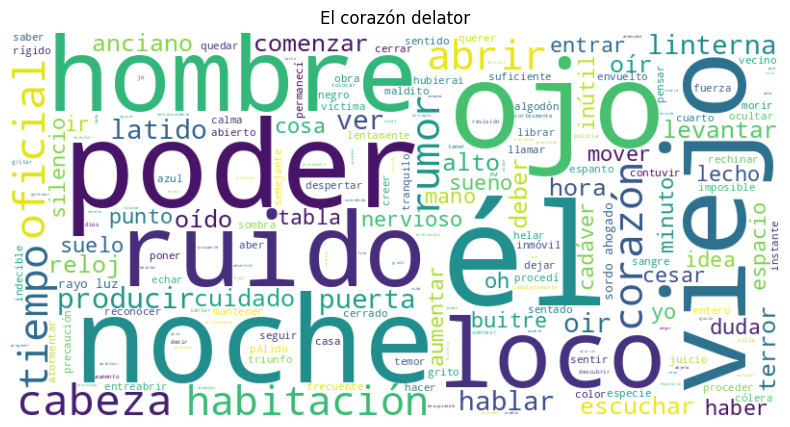

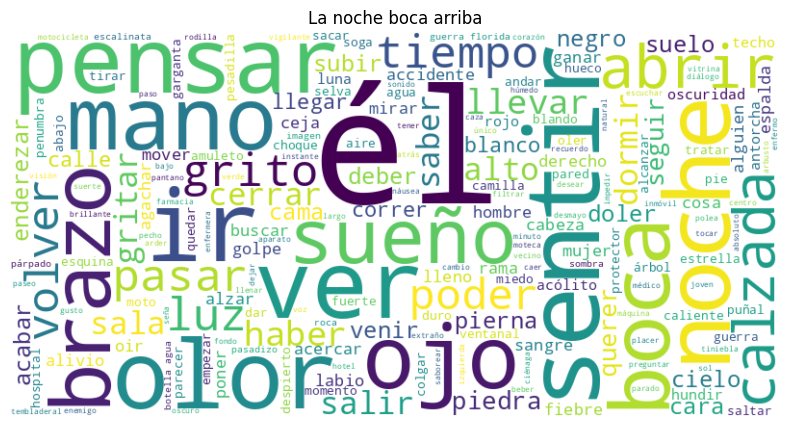

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def nube(tokens, titulo):
    texto = ' '.join(tokens)
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto)
    plt.figure(figsize=(10,5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

nube(tokens_1, "El corazón delator")
nube(tokens_2, "La noche boca arriba")


En El corazón delator, las palabras más comunes son “poder”, “noche”, “ojo”, “viejo”, “hombre”, “ruido” y “loco”. Esto nos da pistas sobre el tema central: el cuento gira en torno a una noche tensa donde el “ojo viejo” de un personaje es importante, junto con sonidos y la mente alterada (la locura). Las palabras reflejan el ambiente oscuro y la obsesión del narrador.

Por otro lado, en La noche boca arriba aparecen mucho términos como “ir”, “sentir”, “olor”, “mano”, “brazo”, “boca”, “sueño” y “calzada”. Estas palabras sugieren movimiento, sensaciones corporales y una atmósfera que alterna entre lo real y lo onírico, como indica el título. El cuento parece centrarse en experiencias físicas, sueños y una sensación de viaje o huida.

## Paso 5: POS tagging y nubes por categoría

Sustantivos - El corazón delator (frecuentes): [('noche', 11), ('ojo', 11), ('hombre', 8), ('ruido', 8), ('cabeza', 7), ('habitación', 6), ('tiempo', 6), ('rumor', 6), ('puerta', 5), ('linterna', 5)]



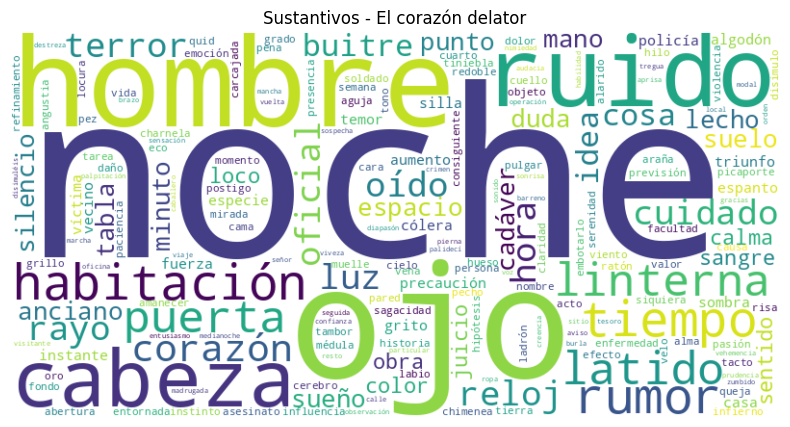

Sustantivos - La noche boca arriba (frecuentes): [('olor', 12), ('noche', 10), ('ojo', 10), ('mano', 9), ('sueño', 9), ('calzada', 8), ('tiempo', 7), ('grito', 7), ('brazo', 7), ('boca', 7)]



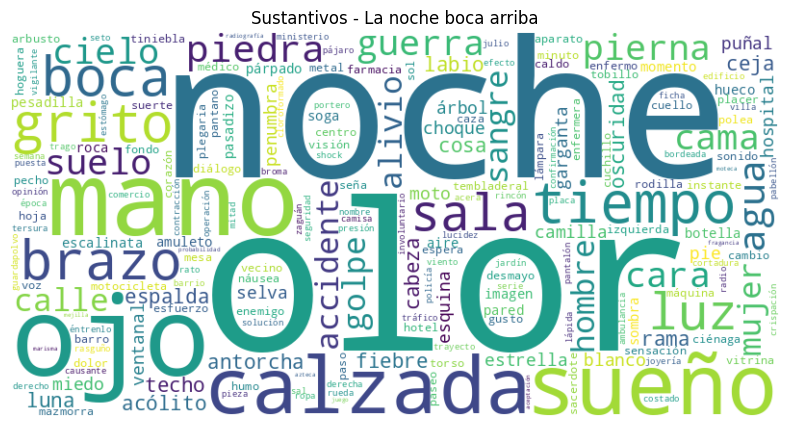

Verbos - El corazón delator (frecuentes): [('abrir', 6), ('ver', 5), ('hablar', 5), ('producir', 5), ('escuchar', 4), ('comenzar', 4), ('levantar', 4), ('oir', 4), ('mover', 3), ('entrar', 3)]



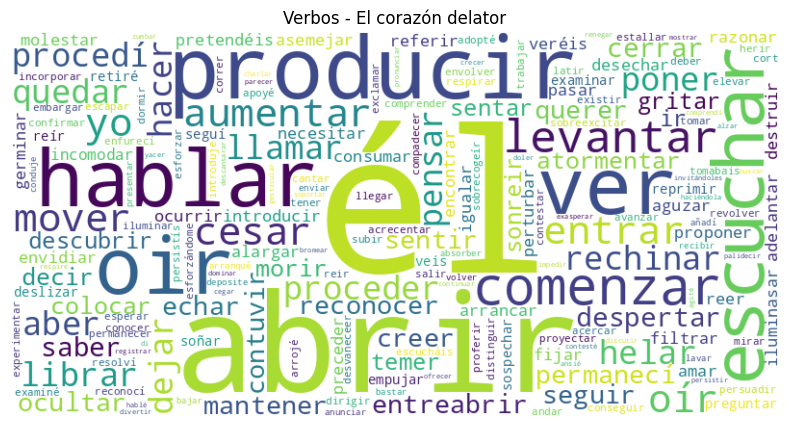

Verbos - La noche boca arriba (frecuentes): [('sentir', 13), ('pensar', 11), ('ver', 10), ('volver', 7), ('llevar', 7), ('abrir', 7), ('salir', 6), ('pasar', 6), ('gritar', 6), ('cerrar', 6)]



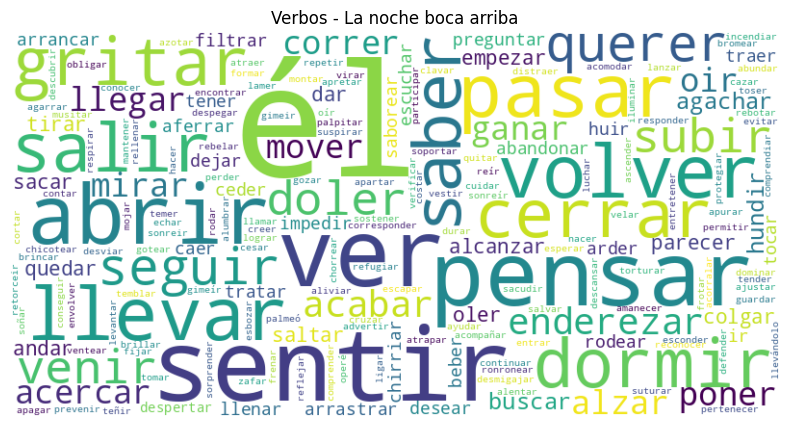

Adjetivos - El corazón delator (frecuentes): [('viejo', 10), ('loco', 4), ('sordo', 4), ('alto', 4), ('nervioso', 3), ('ahogado', 3), ('inútil', 3), ('oficial', 3), ('imposible', 2), ('azul', 2)]



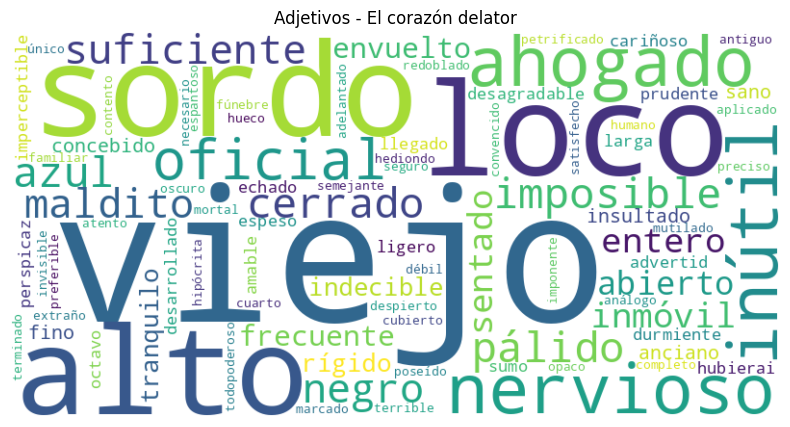

Adjetivos - La noche boca arriba (frecuentes): [('alto', 5), ('negro', 5), ('lleno', 4), ('rojo', 4), ('derecho', 3), ('blando', 3), ('duro', 3), ('caliente', 3), ('fuerte', 3), ('brillante', 2)]



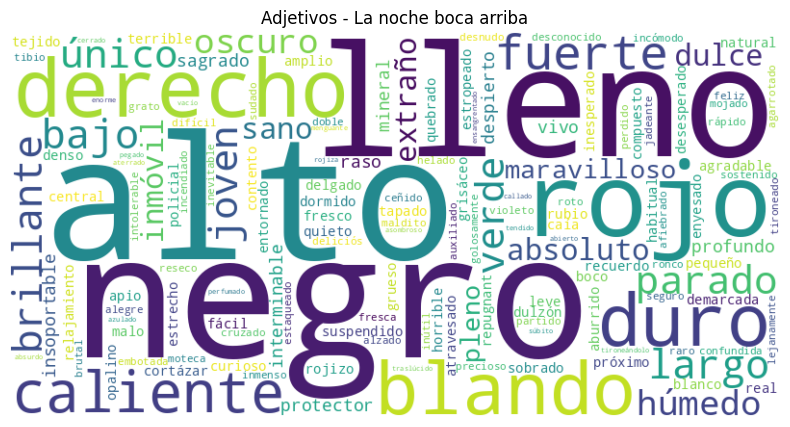

In [ ]:
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para extraer tokens por tipo gramatical (POS)
def extraer_por_pos(texto, pos_tag):
    doc = nlp(texto)
    return [token.lemma_.lower() for token in doc
            if token.pos_ == pos_tag
            and token.is_alpha
            and token.text.lower() not in STOP_WORDS]

# Función para mostrar nubes y frecuencias
def nube_y_frecuencias(tokens, titulo):
    frecs = Counter(tokens).most_common(10)
    print(f"{titulo} (frecuentes): {frecs}\n")
    wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(titulo)
    plt.show()

# Mostrar nubes y frecuencias para cada POS
for tag, etiqueta in [("NOUN", "Sustantivos"), ("VERB", "Verbos"), ("ADJ", "Adjetivos")]:
    tokens1 = extraer_por_pos(texto_1_norm, tag)
    tokens2 = extraer_por_pos(texto_2_norm, tag)
    nube_y_frecuencias(tokens1, f"{etiqueta} - El corazón delator")
    nube_y_frecuencias(tokens2, f"{etiqueta} - La noche boca arriba")



Al observar las palabras más frecuentes por categoría gramatical, se aprecian claras diferencias en el enfoque y tono de cada texto.

Sustantivos:
En El corazón delator, predominan sustantivos como ojo, ruido, hombre, habitación y cabeza, lo que sugiere una narrativa centrada en los detalles físicos, el espacio cerrado y los elementos de tensión psicológica. La insistencia en términos como ojo y corazón apunta al enfoque obsesivo del narrador y a la intensidad de su percepción sensorial.
En cambio, en La noche boca arriba, aparecen sustantivos como olor, mano, sueño, calzada y brazo, que reflejan un relato con elementos oníricos, sensoriales y corporales. El uso reiterado de sueño y noche refuerza la ambigüedad entre la vigilia y el mundo onírico, uno de los temas centrales del cuento.

Verbos:
Los verbos frecuentes en El corazón delator como abrir, ver, hablar y producir reflejan acciones precisas, casi quirúrgicas, relacionadas con la vigilancia, el sigilo y la confesión. Estas acciones transmiten la ansiedad creciente del narrador y su lucha por controlar su entorno.
En La noche boca arriba, predominan verbos como sentir, pensar, ver, volver y llevar, lo que revela un enfoque más introspectivo y emocional. Muchas de estas acciones están asociadas a la percepción subjetiva, la experiencia sensorial y la confusión entre sueño y realidad.

Adjetivos:
El corazón delator usa adjetivos como viejo, loco, sordo y nervioso, que aportan una carga emocional negativa y retratan al protagonista como inestable, obsesivo y al anciano como un ser siniestro.
En La noche boca arriba, adjetivos como negro, rojo, caliente, duro y brillante están muy vinculados a sensaciones táctiles y visuales, lo que refuerza la atmósfera sensorial y la intensidad de la experiencia del protagonista.

Ambos textos comparten ciertos elementos como la noche, el cuerpo y la percepción, pero los usan con propósitos distintos. Poe enfatiza la culpa, el delirio y la obsesión con un lenguaje más claustrofóbico y directo, mientras que Cortázar construye una atmósfera ambigua, multisensorial y onírica. Las palabras frecuentes ayudan a revelar la psicología de los personajes y los temas centrales de cada cuento.

## Paso 7: Extraer tripletas SVO

In [ ]:
def extraer_svo_mejorado(doc):
    tripletas = []
    for sent in doc.sents: # Iterar sobre frases
        sujeto = None
        verbo = None
        objeto = None
        for token in sent:
            if token.dep_ in ("nsubj", "nsubj_pass"):
                sujeto = token.text
            elif token.pos_ == "VERB":
                verbo = token.text
            elif token.dep_ in ("dobj", "obj", "iobj"):
                objeto = token.text

            # Si encontramos los tres elementos dentro de la misma frase, los añadimos
            # Esto es una simplificación, un análisis más profundo implicaría seguir dependencias.
            if sujeto and verbo and objeto:
                tripletas.append((sujeto, verbo, objeto))
                # Reiniciamos para la siguiente potencial tripleta en la misma frase
                sujeto = None
                verbo = None
                objeto = None

    return tripletas

svo_1_mejorado = extraer_svo_mejorado(doc1)
svo_2_mejorado = extraer_svo_mejorado(doc2)

print("Tripletas SVO mejorado - El corazón delator")
print(svo_1_mejorado[:5])

print("Tripletas SVO mejorado - La noche boca arriba")
print(svo_2_mejorado[:5])


Tripletas SVO mejorado - El corazón delator
[('enfermedad', 'aguzado', 'sentidos'), ('embotarlos', 'Tenía', 'oído'), ('ninguno', 'igualaba', 'le'), ('historia', 'referirles', 'Cómo'), ('idea', 'ocurrió', 'me')]
Tripletas SVO mejorado - La noche boca arriba
[('portero', 'sacar', 'motocicleta'), ('sol', 'iba', 'le'), ('moto', 'saboreando', 'paseo'), ('viento', 'ronroneaba', 'le'), ('que', 'entraba', 'paseo')]


Tripletas en El corazón delator
Ejemplos:

- ('enfermedad', 'aguzado', 'sentidos')

- ('embotarlos', 'Tenía', 'oído')

- ('ninguno', 'igualaba', 'le')

- ('historia', 'referirles', 'Cómo')

- ('idea', 'ocurrió', 'me')

Estas tripletas reflejan el enfoque introspectivo y obsesivo del narrador. Se nota una constante autorreferencia (me ocurrió, le igualaba) y una atención desmedida al funcionamiento de los sentidos, en particular el oído. Esto es coherente con el argumento del cuento: un hombre que intenta demostrar su cordura mientras relata cómo lo traiciona su percepción sensorial. Las relaciones revelan cómo el personaje principal convierte detalles aparentemente triviales en motivos para la paranoia y la violencia. La reiteración de elementos personales y sensoriales da cuenta de una tendencia egocéntrica y enfermiza.

Tripletas en La noche boca arriba
Ejemplos:

- ('portero', 'sacar', 'motocicleta')

- ('sol', 'iba', 'le')

- ('moto', 'saboreando', 'paseo')

- ('viento', 'ronroneaba', 'le')

- ('que', 'entraba', 'paseo')

En este texto, las tripletas capturan escenas dinámicas y sensoriales con sujetos concretos como el portero, el sol, el viento, o la moto. Muchas de estas acciones parecen normales o incluso placenteras, como saboreando el paseo, lo cual crea una falsa sensación de cotidianidad. Esta construcción narrativa va siendo invadida progresivamente por un ambiente más perturbador y confuso. La alternancia entre planos de realidad y sueño se insinúa en cómo sujetos inanimados (como el sol o el viento) adquieren protagonismo en las acciones. A través de estas relaciones, se percibe una tendencia hacia la desorientación del protagonista y una pérdida progresiva del control sobre su entorno.